In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad


/tmp/ipykernel_1057054/905986793.py:22: RuntimeWarning: overflow encountered in exp
  integral_quad, _ = quad(lambda x: x**3 / (np.exp(x) - 1), 0, np.inf)


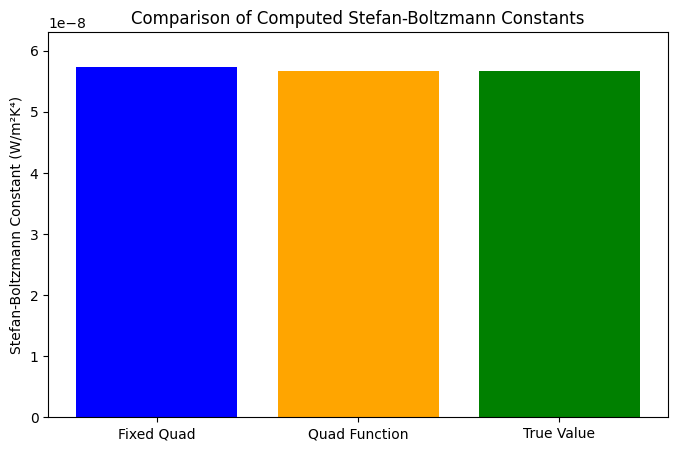

(5.730896893495137e-08, 5.662703503454045e-08, 5.670367e-08)

In [4]:

# Constants
k_B = 1.38064852e-23  # Boltzmann constant (J/K)
h = 6.626e-34         # Planck's constant (J·s)
c = 3e8              # Speed of light (m/s)
pi = np.pi

# Prefactor
h_bar = h / (2 * pi)
prefactor = (k_B**4) / (c**2 * h_bar**3 * 4 * pi**2)

# Transformation x -> z
def transformed_integrand(z):
    x = z / (1 - z)
    dx_dz = 1 / (1 - z)**2
    return (x**3 / (np.exp(x) - 1)) * dx_dz

# Compute integral using fixed quadrature
integral_fixed, _ = fixed_quad(transformed_integrand, 0, 1, n=10)
sigma_fixed = prefactor * integral_fixed

# Compute integral using quad function
integral_quad, _ = quad(lambda x: x**3 / (np.exp(x) - 1), 0, np.inf)
sigma_quad = prefactor * integral_quad

# True Stefan-Boltzmann constant
sigma_true = 5.670367e-8  # W/m²K⁴

# Plot comparison
labels = ["Fixed Quad", "Quad Function", "True Value"]
values = [sigma_fixed, sigma_quad, sigma_true]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=["blue", "orange", "green"])
plt.ylabel("Stefan-Boltzmann Constant (W/m²K⁴)")
plt.title("Comparison of Computed Stefan-Boltzmann Constants")
plt.ylim(0, max(values) * 1.1)
plt.show()

# Print results
sigma_fixed, sigma_quad, sigma_true


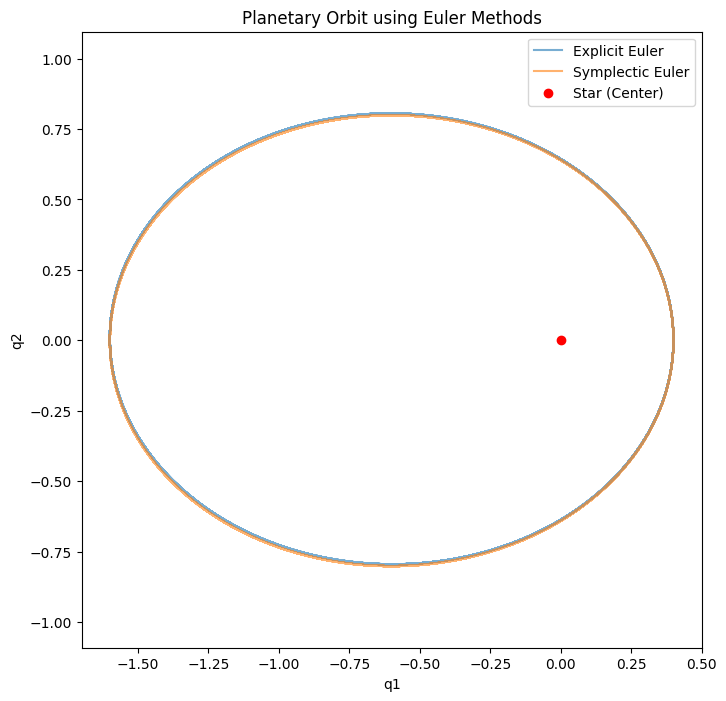

In [5]:
# Orbital Mechanics using Explicit Euler and Symplectic Euler

# Parameters
e = 0.6  # Eccentricity
Tf = 200  # Final time
N_explicit = 100000  # Steps for explicit Euler
N_symplectic = 400000  # Steps for symplectic Euler
dt_explicit = Tf / N_explicit
dt_symplectic = Tf / N_symplectic

# Initial conditions
q1_0, q2_0 = 1 - e, 0
p1_0, p2_0 = 0, np.sqrt((1 + e) / (1 - e))

# Function to compute acceleration
def acceleration(q1, q2):
    r3 = (q1**2 + q2**2)**(3/2)
    return -q1 / r3, -q2 / r3

# Explicit Euler Method
q1_exp, q2_exp = [q1_0], [q2_0]
p1_exp, p2_exp = [p1_0], [p2_0]

for _ in range(N_explicit):
    q1_new = q1_exp[-1] + dt_explicit * p1_exp[-1]
    q2_new = q2_exp[-1] + dt_explicit * p2_exp[-1]
    a1, a2 = acceleration(q1_new, q2_new)
    p1_new = p1_exp[-1] + dt_explicit * a1
    p2_new = p2_exp[-1] + dt_explicit * a2
    q1_exp.append(q1_new)
    q2_exp.append(q2_new)
    p1_exp.append(p1_new)
    p2_exp.append(p2_new)

# Symplectic Euler Method
q1_sym, q2_sym = [q1_0], [q2_0]
p1_sym, p2_sym = [p1_0], [p2_0]

for _ in range(N_symplectic):
    a1, a2 = acceleration(q1_sym[-1], q2_sym[-1])
    p1_new = p1_sym[-1] + dt_symplectic * a1
    p2_new = p2_sym[-1] + dt_symplectic * a2
    q1_new = q1_sym[-1] + dt_symplectic * p1_new
    q2_new = q2_sym[-1] + dt_symplectic * p2_new
    q1_sym.append(q1_new)
    q2_sym.append(q2_new)
    p1_sym.append(p1_new)
    p2_sym.append(p2_new)

# Plot the orbits
plt.figure(figsize=(8, 8))
plt.plot(q1_exp, q2_exp, label="Explicit Euler", alpha=0.6)
plt.plot(q1_sym, q2_sym, label="Symplectic Euler", alpha=0.6)
plt.scatter([0], [0], color='red', label="Star (Center)")
plt.xlabel("q1")
plt.ylabel("q2")
plt.title("Planetary Orbit using Euler Methods")
plt.legend()
plt.axis("equal")
plt.show()


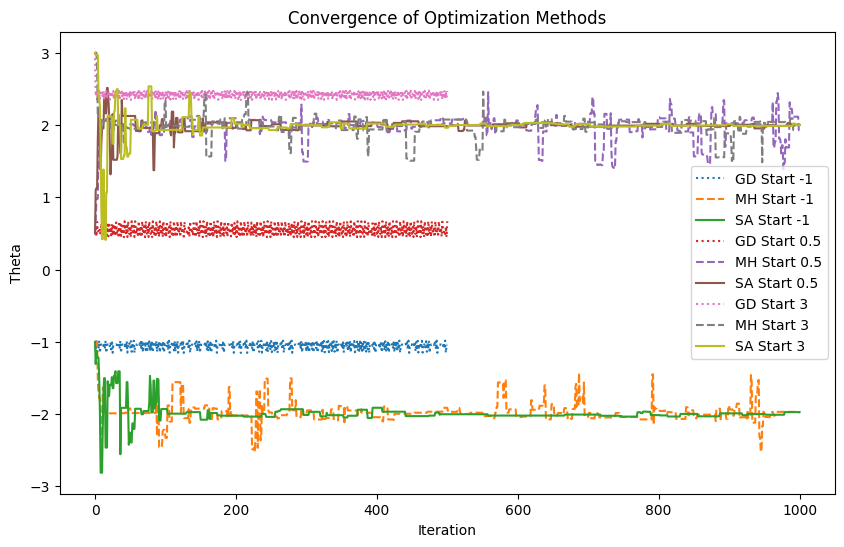

In [6]:
# Optimization using Gradient Descent, Metropolis-Hastings, and Simulated Annealing

# Define the noisy ϕ⁴ potential function
def H(theta):
    return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)

# Define its gradient
def dH(theta):
    return 4*theta**3 - 16*theta + 8*np.pi*np.sin(4*np.pi*theta)

# Gradient Descent Implementation
def gradient_descent(theta_init, alpha=0.01, tol=1e-5, max_iter=500):
    theta = theta_init
    trajectory = [theta]
    
    for _ in range(max_iter):
        grad = dH(theta)
        theta -= alpha * grad
        trajectory.append(theta)
        if abs(grad) < tol:
            break
    return trajectory

# Metropolis-Hastings Algorithm
def metropolis_hastings(theta_init, beta=1, sigma=0.5, steps=1000):
    theta = theta_init
    trajectory = [theta]

    for _ in range(steps):
        theta_new = theta + np.random.normal(0, sigma)
        delta_H = H(theta_new) - H(theta)
        if delta_H < 0 or np.random.rand() < np.exp(-beta * delta_H):
            theta = theta_new
        trajectory.append(theta)
    
    return trajectory

# Simulated Annealing
def simulated_annealing(theta_init, beta_init=0.1, delta_beta=0.01, sigma=0.5, steps=1000):
    theta = theta_init
    beta = beta_init
    trajectory = [theta]

    for _ in range(steps):
        theta_new = theta + np.random.normal(0, sigma)
        delta_H = H(theta_new) - H(theta)
        if delta_H < 0 or np.random.rand() < np.exp(-beta * delta_H):
            theta = theta_new
        beta += delta_beta  # Cooling schedule
        trajectory.append(theta)

    return trajectory

# Initial guesses
initial_guesses = [-1, 0.5, 3]

# Run all methods and plot results
plt.figure(figsize=(10, 6))

for theta0 in initial_guesses:
    gd_trajectory = gradient_descent(theta0)
    mh_trajectory = metropolis_hastings(theta0)
    sa_trajectory = simulated_annealing(theta0)

    plt.plot(gd_trajectory, label=f"GD Start {theta0}", linestyle="dotted")
    plt.plot(mh_trajectory, label=f"MH Start {theta0}", linestyle="dashed")
    plt.plot(sa_trajectory, label=f"SA Start {theta0}", linestyle="solid")

plt.xlabel("Iteration")
plt.ylabel("Theta")
plt.title("Convergence of Optimization Methods")
plt.legend()
plt.show()
